In [3]:
import pandas as pd
crop_price = pd.read_csv("Crop_Yield_Prediction.csv")

In [4]:
crop_price.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [5]:
crop_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [6]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Mean Absolute Error: 1871.0571818181816
Root Mean Squared Error: 2966.497443196652


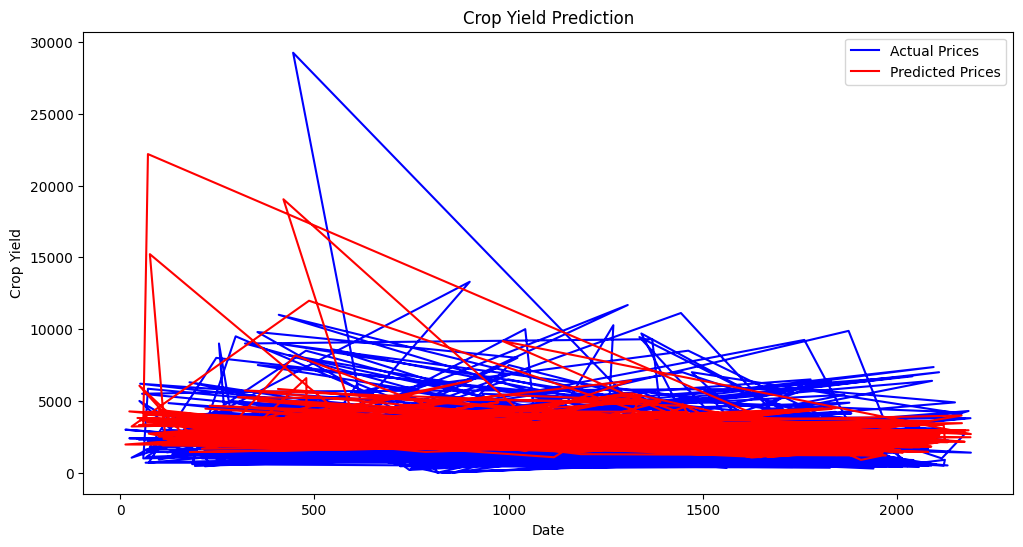

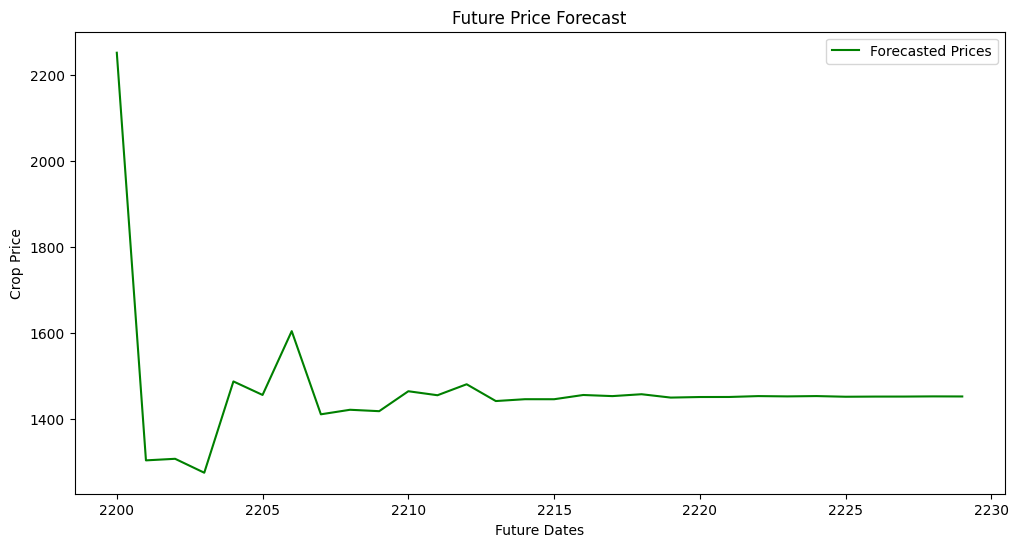

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
# Load dataset (Replace with actual data source)
df = pd.read_csv("Crop_Yield_Prediction.csv")
# Data preprocessing
df.dropna(inplace=True)
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# Feature selection and engineering
# df['Month'] = df.index.month
# df['Year'] = df.index.year
# Splitting data into train and test sets
X = df[['Temperature', 'Rainfall', 'Nitrogen', 'Humidity', 'pH_Value', 'Potassium']]
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Model training - Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
# Predictions
y_pred = model.predict(X_test_scaled)
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
# Time Series Forecasting using ARIMA
model_arima = sm.tsa.ARIMA(y, order=(5,1,0))
model_arima_fit = model_arima.fit()
y_forecast = model_arima_fit.forecast(steps=30)
# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Crop Yield')
plt.title('Crop Yield Prediction')
plt.show()
# Forecasting plot
plt.figure(figsize=(12, 6))
plt.plot(y_forecast, label='Forecasted Prices', color='green')
plt.legend()
plt.xlabel('Future Dates')
plt.ylabel('Crop Price')
plt.title('Future Price Forecast')
plt.show()